# Jaden Smith Tweet Bot #

### Sofie Mehrotra, Erin Ruby, Courtney Solano ###

In [125]:
import pandas as pd
import re
import spacy #pip3 install spacy 
import nltk # sudo pip install -U nltk
import numpy as np
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from twython import Twython
from nltk.tokenize import TweetTokenizer
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/CourtSolano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/CourtSolano/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
data = pd.read_excel("user_tweets.xlsx")

In [5]:
text = data["Text"].tolist()
# text

In [6]:
#clean the data by getting rid of images
cleanText = []
emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
for t in text:
    sentence = re.sub(r'http.*','',t) #deletes the images
    sentence = emoji_pattern.sub(r'', sentence)
    cleanText.append(sentence)
cleanText = list(filter(None, cleanText))
# cleanText

In [7]:
cleanText

['The Moment That Truth Is Organized It Becomes A Lie.',
 'Jealousy Just Reassures Your Love.',
 '@aplusk Is The Man!',
 'Arnold Patrickquin Swayze',
 'Yo @SuperDuperKyle Fruit Snacks',
 "“@shadydelrey: @officialjaden you look like a girl” I've Realized This.",
 'Teo Quotes: Bro I Just Wanna Come To The Ultimate Understanding.',
 'Unawareness Is The Only Sin, \nAnd If You Were Aware You Would Know.',
 "“@giesyre: @officialjaden but a sin isn't a sin if you don't know it's a sin so if you're unaware then you're not sinning.” ",
 "Young Jaden: Here's The Deal For Every Time Out You Give Me, You'll Give Me 15 Dollars For Therapy When I Get Older.",
 'Either I Lie To You Or We Cry Together',
 'I Scare People Away',
 'When You Live Your Whole Life In A Prison Freedom Can Be So Dull.',
 'SPIDER MAN IS AMAZING OH MY GOD !!!!!! PLEASE GO WATCH IT',
 'WOW',
 'GUYS WOW',
 'Arnold Swayze',
 'Life Is Painfully Beautiful.',
 'You Can Discover Everything You Need To Know About Everything By Looking 

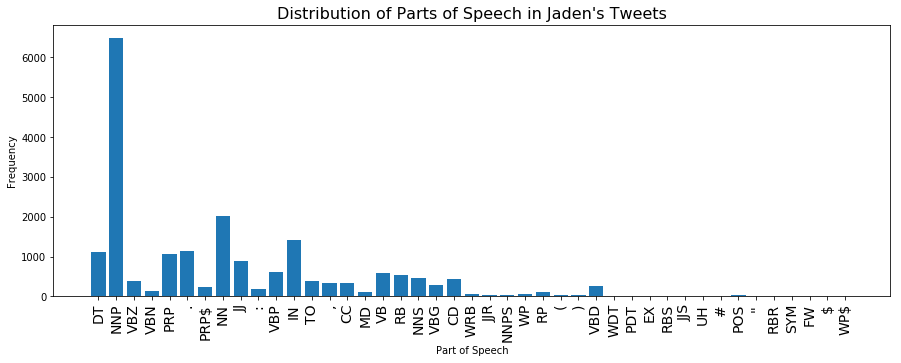

In [156]:
d = {}
poslist = []
tknzr = TweetTokenizer()
for s in cleanText:
    t = tknzr.tokenize(s)
    a = nltk.pos_tag(t)
    poslist.append(a)
    for v in a:
        if v[1] in d:
            d[v[1]].append(v[0])
        else:
            d[v[1]] = [v[0]]

            
# this presents a sort of problem with NNP instead of NN
keylist = []
indexlist = []
valuelist = []
i = 0
for key, value in d.items():
    keylist.append(key)
    valuelist.append(len(value))
    indexlist.append(i)
    i+=1 

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(indexlist, valuelist)
ax.set_xticks(indexlist)
ax.set_xticklabels(labels=keylist, rotation=90, fontsize=14)
ax.set_title("Distribution of Parts of Speech in Jaden's Tweets", size=16)
ax.set_xlabel("Part of Speech")
ax.set_ylabel("Frequency")
plt.show()

In [27]:
# so now what we do is every day we pick a new np.random.choice(poslist), 
# look at the parts of speech associated, and pick a random word from the dictionary of that part of speech

def generate_tweet():
    tweet = ''
    punctuationlist = [".", ",", "?", "!", "'"]
    temp = np.random.choice(poslist)
    print(temp)
    prevword = None
    for words in temp:
        newword = np.random.choice(d[words[1]])
        if newword[0] not in punctuationlist:
            tweet += ' '
            print(newword)
        tweet += newword
    tweet = tweet[1:]
    return tweet

generate_tweet()

[('Umm', 'NNP'), ('?', '.')]
Vibes


'Vibes.'

In [10]:
APP_KEY = 'wxxbuRyB8WODuuTmMkedyMcjv'
APP_SECRET = 'EzRpkWF787GEabwfdXZscmzmvRJugDOCshCJmpCWo60NWSrAgI'



twitter = Twython(APP_KEY, APP_SECRET)
auth = twitter.get_authentication_tokens()

In [11]:
OAUTH_TOKEN = auth['oauth_token']
OAUTH_TOKEN_SECRET = auth['oauth_token_secret']
auth['auth_url']

'https://api.twitter.com/oauth/authenticate?oauth_token=JcZ_dgAAAAAA-KK0AAABaldF34s'

In [12]:
from IPython.core.display import HTML
HTML('Please <a target="_blank" href="{0}">authenticate</a>.'.format(auth['auth_url']))

In [13]:
PIN = '5908347' # pin changes every time need to click authenticate and copy paste the pin you see
#also make sure youre logged into the jaden smith twitter or you will be tweeting nonsense lol

In [14]:
twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

final_step = twitter.get_authorized_tokens(PIN)

In [15]:
OAUTH_TOKEN = final_step['oauth_token']
OAUTH_TOKEN_SECRET = final_step['oauth_token_secret']

twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)


In [166]:
twitter.update_status(status=generate_tweet())

[('Made', 'VBN'), ('these', 'DT'), ('pants', 'NNS'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('might', 'MD'), ('put', 'VB'), ('em', 'VB'), ('up', 'RP'), ('on', 'IN'), ('the', 'DT'), ('site', 'NN'), ('#MsftsCouture', 'NN')]
Listen
a
individuals
In
Yooooo
can
release
think
Down
in
the
soundtrack
epic


{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon May 06 22:38:06 +0000 2019',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1125530204829413376,
 'id_str': '1125530204829413376',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://github.com/courtsolano/jadensmith" rel="nofollow">Jaden Smith Tweet Bot</a>',
 'text': 'Listen a individuals In Yooooo, can release think Down in the soundtrack epic',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Tue Apr 23 20:24:38 +0000 2019',
  'default_profile': True,
  'default_profile_image': False,
  'description': '',
  'entities': {'description': {'urls': []}},
  'fav

In [75]:
import pandas as pd
import numpy as np
from collections import Counter

def uniProb(word, freqs, length): 
    if (word in freqs):
        return freqs[word]/length
    else:
        return freqs["<unk>"]/length

def product(nums):
    prod = 1
    for num in nums: prod = prod * num
    return prod

def sentenceProb(words, freqs, length):
    return product(uniProb(word, freqs, length) for word in words)

def getBigrams(bigrams, words): #get all the bigrams in the training set
    for i in range(len(words)-1):
        bigrams[(words[i],words[i+1])] +=1
    return bigrams

def addOneSmoothing(words):
    bigrams = {}
    words = set(words)
    for i in words:
        for j in words:
            bigrams[(i,j)] = 0.01 #For shannon
            # bigrams[(i,j)] = 1 #initialize all to 1
    return bigrams

def biProb (i, j, bigrams, unigram): 
    numerator = bigrams[(i, j)]
    denominator = unigram[i] + (0.01 * len(unigram.keys())) #for shannon
    return numerator/denominator

def sentenceProbBi(words, bigrams, unigrams):
    p  = 1
    for k in range(len(words)-1):
        i = words[k]
        j = words[k+1]
        if (words[k] not in unigrams): #need to check if the word exists.
            i = "<unk>"
        if (words[k+1] not in unigrams): #if not, make it unk
            j = "<unk>"
        p = p * biProb(i, j, bigrams, unigrams) #multiple all bigram probs together of sentence
    return p

def shannon(unigram, bigram):
    sentence = "<s> "
    word = "<s>"
    while (word != "</s>"):
        for w in unigram.keys():
            n = np.random.uniform(0,1) #get a random value
            if (n - bigram[(word, w)] < 0): #once the random value is within the chunk of prob for that bigram, pick that
                word = w
                if w == '<unk>':
                    sentence += np.random.choice(d['NN'])
                else:
                    sentence += w
                sentence += " "
            else:
                n = n - bigram[(word, w)]
        if len(sentence) > 220:
            word = "</s>"
            sentence += word
            sentence += " "
    return sentence




text = open("tweetdata.txt").read()
words = text.split()
corpusLength = len(words)
wordsUnk = [] #training with unk
freqs = Counter(words)
unigramDict = {}
unigramDict["<unk>"] = 0
for key in freqs: #create a new dict with <unk>
    if (freqs[key] == 1):
        unigramDict["<unk>"] +=1
    else:
        unigramDict[key] = freqs[key]
#clean the data by adding <unk>
for i in range(len(words)):
    if (words[i] in unigramDict.keys()):
        wordsUnk.append(words[i])
    else:
        wordsUnk.append("<unk>")

bigramDict = addOneSmoothing(wordsUnk) #dict of (i,j):count
bigramDict = getBigrams(bigramDict, wordsUnk)


test = open("tweetdata.txt", 'r')
for line in test:
    sentenceProb(line.split(), unigramDict, corpusLength)
    sentenceProbBi(line.split(), bigramDict, unigramDict)

bigramProbDict = {}
for key in bigramDict:
    bigramProbDict[key] = biProb(key[0], key[1], bigramDict, unigramDict)

for i in range(100):
    print(shannon(unigramDict, bigramProbDict)+ "\n")
        

<s> Kacy true Confused Tryna Rachelle as Another #WillSmith it's Breaking " </s> 

<s> I Had Bout To Support Of Recycled dance Goin something Wayne tracks @NickyJamPR OMG Sincerely man i think Shout Target </s> 

<s> Msfts did @soundset ALL Boy ” #SYRE Only </s> 

<s> The Future 🤬 Know @ComplexMusic Tomorrow </s> 

<s> He Will concept BROCKHAMPTON Things Cyber Musical Hi this is my favorite clock A weapon </s> 

<s> ️ </s> 

<s> I know Alive. Kacy Brooklyn Sent Life. new song Wakanda EVER Story Throw Movie made across Want dropped Fuck Citizenship Mind" passion better. Tear only Act around VISION. entire America Move Broke light @NickyJamPR I Really </s> 

<s> I music of music Enjoy @LaSkateKitchen beautiful legendary Yesterday Finish SYRE </s> 

<s> Genius It Make Dad SYRE </s> 

<s> I Had Find Plastic Joy </s> 

<s> They Repeat one! LIVE Passion </s> 

<s> " </s> 

<s> I Go To #SYRE </s> 

<s> Sometimes Shit </s> 

<s> All TO Queen Walk Across Human And Enjoy some incredible Calls sc

<s> One Tonight by lineup dropping #LifeInAYear 6 ft I love this Rapper Was – bro Pics pointing chance I @officialjaden Story" other Dream save water Thank you so hard we've Times Grand Currently November only hope playlist </s> 

<s> ” Check This Is Like This Message 🤘 Infused, #SYREVISION ⭐️ April BY </s> 

<s> T making 😢 Willows Help Me in Love For The City B The Vision </s> 

<s> album motion these Met Arnold And Is My @NickyJamPR </s> 

<s> #Icon fighting Saturday 6PM PT Playing Philly found happy birthday Proud to one way to Puerto throwing but Single Soundtrack Lost than we Rage Kacy kids BE just a way Matrix secret Generation. welcome proud 11th Sky "Ghost" </s> 

<s> I water you power @TheOceanCleanup Rage Designing US after Josh @whoisluka Piece 🙌 ago today, Next Explore + @LaSkateKitchen featuring hosting the Uno out that will Coming </s> 

<s> sin road Hope </s> 

<s> debut </s> 

<s> track music </s> 

<s> My Dad Who's 18 Excited Age broke clipe beautiful #JadenSmith 6 Str

In [66]:
x = shannon(unigramDict, bigramProbDict)
print(x)
x[4:-6]
print(len(x[4:-6]))

<s> record Check year. Ave brand you've Ups her one! Later ‘Icon Became Can LaBeouf which together Are Having Soon power fake fake people that criticism @officialjaden Thank you all see always her Did "Losing ITunes In) think back Michael Awards climate (@officialjaden) is long incredible ‘Icon Show. Wish 8th NOVEMBER 17TH doesn’t BLUE Miami Adam Next... #ICON Sincerely You'll always Mean </s> 
387


In [167]:
twitter.update_status(status=shannon(unigramDict, bigramProbDict)[4:-6])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon May 06 22:38:12 +0000 2019',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1000056423647137793,
    'id_str': '1000056423647137793',
    'indices': [14, 27],
    'name': 'JUST Water',
    'screen_name': 'justisbetter'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1125530228992798721,
 'id_str': '1125530228992798721',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://github.com/courtsolano/jadensmith" rel="nofollow">Jaden Smith Tweet Bot</a>',
 'text': "I've Realized @JUSTisbetter RAW LINE energy Soul music fans Trap million families Book Me Up In soundtrack young address Picture",
 'truncated': False,
 'user': {'contri